<a href="https://colab.research.google.com/github/yogeshne9i/Stock_Price_Analysis/blob/main/Stock_Price_Trend_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Created as part of Skill Ladder – AI/ML Training & Internship Program

In [ ]:
import io
import pandas as pd

df_stock = pd.read_csv('/content/US_Stock_Data.csv')
df_stock.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2/2/2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN
1,1,1/2/2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0


In [ ]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Drop unnecessary column if present
if 'Unnamed: 0' in df_stock.columns:
    df_stock = df_stock.drop(columns=['Unnamed: 0'])

df_stock.info()
df_stock.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1013 non-null   object 
 1   Natural_Gas_Price  1013 non-null   float64
 2   Natural_Gas_Vol.   1009 non-null   float64
 3   Crude_oil_Price    1013 non-null   float64
 4   Crude_oil_Vol.     990 non-null    float64
 5   Copper_Price       1013 non-null   float64
 6   Copper_Vol.        976 non-null    float64
 7   Bitcoin_Price      1013 non-null   object 
 8   Bitcoin_Vol.       1013 non-null   int64  
 9   Platinum_Price     1013 non-null   object 
 10  Platinum_Vol.      636 non-null    float64
 11  Ethereum_Price     1013 non-null   object 
 12  Ethereum_Vol.      1013 non-null   int64  
 13  S&P_500_Price      1013 non-null   object 
 14  Nasdaq_100_Price   1013 non-null   object 
 15  Nasdaq_100_Vol.    1012 non-null   float64
 16  Apple_Price        1013 

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2/2/2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,901.6,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN
1,1/2/2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,922.3,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,932.6,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,931.7,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,938.3,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0


In [ ]:
# Missing values
print(df_stock.isnull().sum())

# Filling missing numeric values with mean
numeric_cols = df_stock.select_dtypes(include=[np.number]).columns
df_stock[numeric_cols] = df_stock[numeric_cols].fillna(df_stock[numeric_cols].mean())

print("\n After filling missing values:")
print(df_stock.isnull().sum())

Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        377
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           46
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

 After filling missing values:
Date 

In [ ]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'], errors='coerce')

# Drop rows where 'Date' could not be parsed (NaT)
df_stock.dropna(subset=['Date'], inplace=True)

# Create Year, Month, Day features
df_stock['Year'] = df_stock['Date'].dt.year
df_stock['Month'] = df_stock['Date'].dt.month
df_stock['Day'] = df_stock['Date'].dt.day

df_stock.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,Year,Month,Day
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.906,37606.752049,"42,580.50",56480,932.6,...,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0,2024,1,31
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.911,37606.752049,"42,946.20",55130,931.7,...,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0,2024,1,30
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.879,37606.752049,"43,299.80",45230,938.3,...,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0,2024,1,29
5,2024-01-26,2.712,73020.0,78.01,365460.0,3.852,37606.752049,"41,811.30",69470,921.3,...,12770000,159.12,51050000,394.14,13160000,"2,026.60",410.0,2024,1,26
6,2024-01-25,2.571,44980.0,77.36,320180.0,3.869,37606.752049,"39,935.70",46300,894.5,...,9450000,157.75,43310000,393.18,15090000,"2,027.10",460.0,2024,1,25


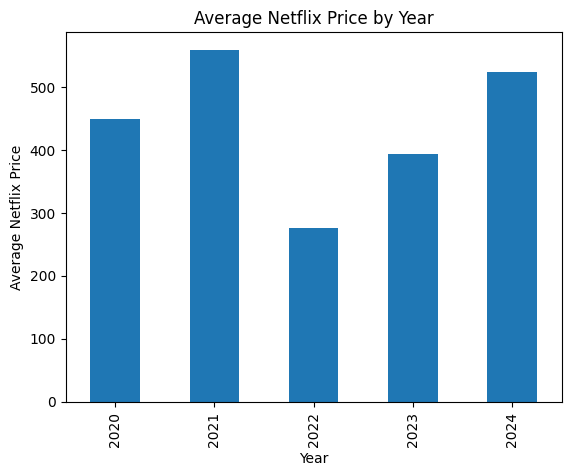

In [ ]:
df_stock.groupby('Year')['Netflix_Price'].mean().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average Netflix Price')
plt.title('Average Netflix Price by Year')
plt.show()

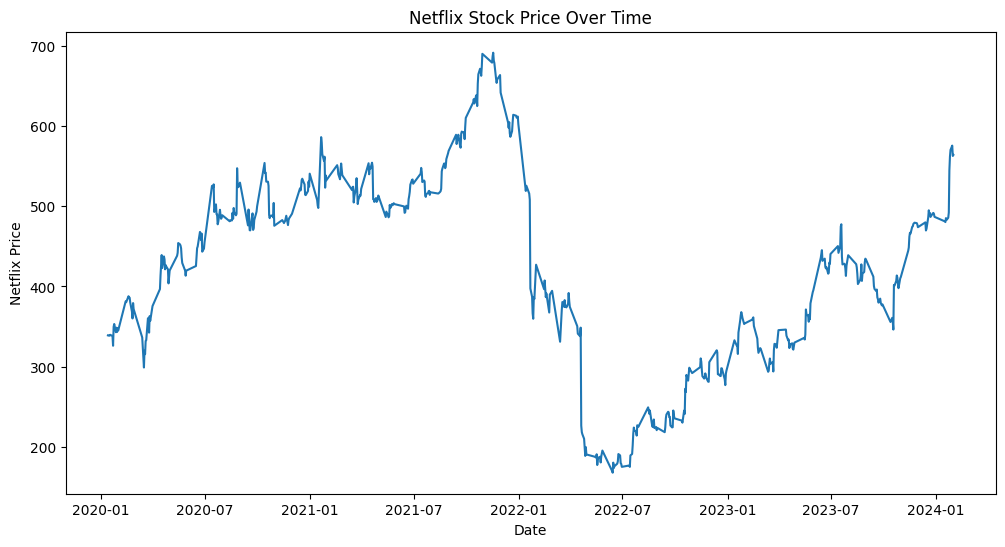

In [ ]:
df_stock.dropna()
plt.figure(figsize=(12,6))
plt.plot(df_stock['Date'], df_stock['Netflix_Price'])
plt.xlabel('Date')
plt.ylabel('Netflix Price')
plt.title('Netflix Stock Price Over Time')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 72.15
Mean Squared Error (MSE): 8490.65
Root Mean Squared Error (RMSE): 92.14
R-squared (R2): 0.37


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 72.15
Mean Squared Error (MSE): 8490.65
Root Mean Squared Error (RMSE): 92.14
R-squared (R2): 0.37


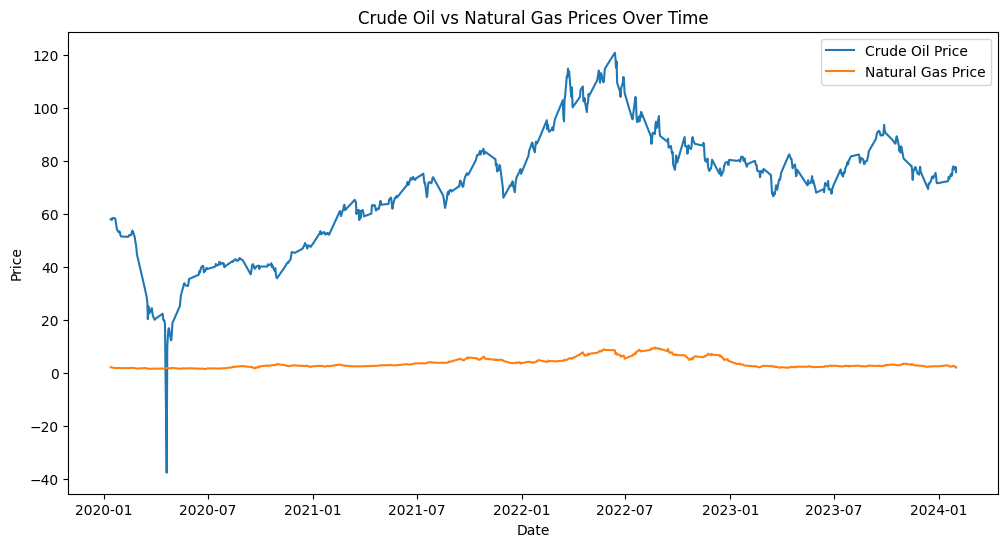

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_stock['Date'], df_stock['Crude_oil_Price'], label='Crude Oil Price')
plt.plot(df_stock['Date'], df_stock['Natural_Gas_Price'], label='Natural Gas Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Crude Oil vs Natural Gas Prices Over Time')
plt.legend()
plt.show()

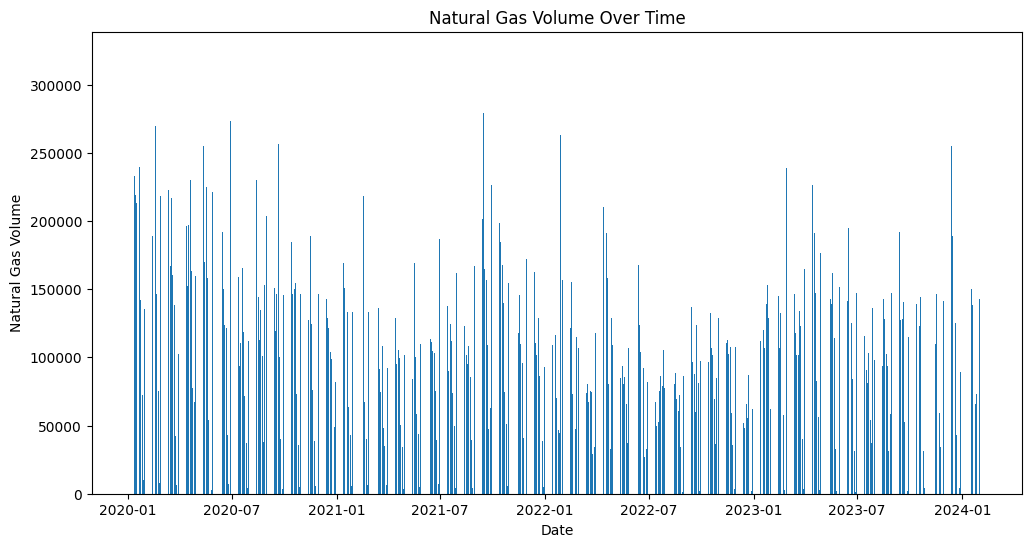

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(df_stock['Date'], df_stock['Natural_Gas_Vol.'])
plt.xlabel('Date')
plt.ylabel('Natural Gas Volume')
plt.title('Natural Gas Volume Over Time')
plt.show()

In [ ]:
features = ['Crude_oil_Price', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Year', 'Month', 'Day']
target = 'Netflix_Price'

X = df_stock[features]
y = df_stock[target]

X.head(), y.head()

(   Crude_oil_Price  Natural_Gas_Price  Natural_Gas_Vol.  Year  Month  Day
 2            75.85              2.100          142860.0  2024      1   31
 3            77.82              2.077          139750.0  2024      1   30
 4            76.78              2.490            3590.0  2024      1   29
 5            78.01              2.712           73020.0  2024      1   26
 6            77.36              2.571           44980.0  2024      1   25,
 2    564.11
 3    562.85
 4    575.79
 5    570.42
 6    562.00
 Name: Netflix_Price, dtype: float64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((491, 6), (123, 6))

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(features, model.coef_):
    print(f"{col}: {coef}")

Intercept: 95685.61896033758
Coefficients:
Crude_oil_Price: 2.014780648632058
Natural_Gas_Price: -43.75629504043707
Natural_Gas_Vol.: -4.19503184474479e-05
Year: -47.14716417310271
Month: 11.282934426032092
Day: -0.024272126670965948


In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

Model Evaluation:
MAE : 72.15381957800577
MSE : 8490.647629403938
RMSE: 92.14471026273803
R²  : 0.36776262508819135


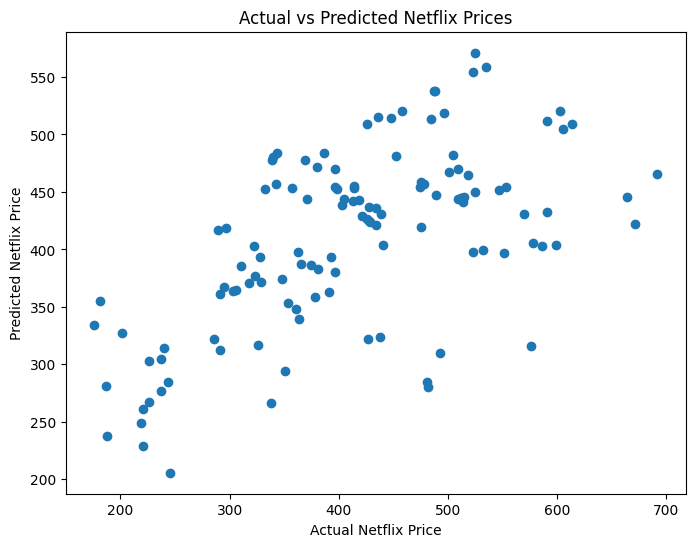

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Netflix Price')
plt.ylabel('Predicted Netflix Price')
plt.title('Actual vs Predicted Netflix Prices')
plt.show()

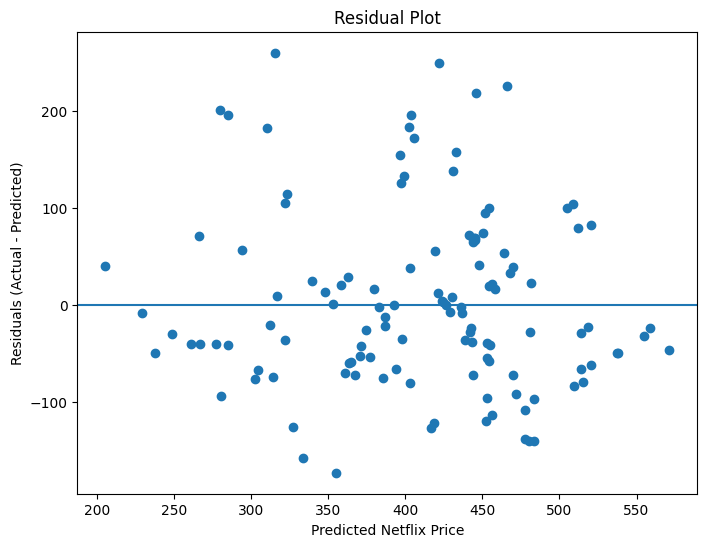

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel('Predicted Netflix Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()